In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sqrls = pd.read_csv('dataframes/bfsqrls.csv')

In [17]:
sqrls = sqrls.drop(columns='Unnamed: 0')

In [46]:
sqrls

,approaches,indifferent,runs_from,running,chasing,climbing,eating,foraging,kuks,quaas,moans,tail_flags,tail_twitches,nearbuilding,neargarden,neargrass,nearpedestrian,nearwater,nearwoods
0,0,0,1,1,0,0,0,0,0,0,0,0,0,False,False,False,False,True,True
1,0,0,1,0,0,1,0,0,0,0,0,0,0,False,False,True,False,False,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False
3,0,0,1,0,0,0,0,1,0,0,0,0,0,False,False,False,False,True,False
4,0,0,0,0,0,0,0,1,0,0,0,0,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,0,1,0,0,0,0,1,0,0,0,0,0,0,False,False,True,False,False,False
1749,0,0,1,0,1,0,0,0,0,0,0,0,1,False,False,True,False,False,False
1750,0,1,0,0,0,1,1,0,1,0,0,0,0,False,False,False,False,True,False
1751,0,1,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True


In [45]:
sqrls['foraging'].value_counts(normalize=True)

0    0.513406
1    0.486594
Name: foraging, dtype: float64

### indifferent, nearwater, neargrass (test 1)

In [53]:
indifferent = sqrls[['indifferent', 'nearwater', 'neargrass']]
grouped = indifferent.groupby(indifferent['indifferent']).sum()
grouped

,nearwater,neargrass
indifferent,,
0,200,368
1,242,272


In [54]:
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
grouped

,nearwater,neargrass
indifferent,,
0,0.452489,0.575
1,0.547511,0.425


In [55]:
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
observed_stat

0.12251131221719463

In [56]:
shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
shuffled_df

,indifferent,nearwater,neargrass,shuffled indifferent
0,0,True,False,0
1,0,False,True,1
2,0,False,True,0
3,0,True,False,0
4,0,True,False,0
...,...,...,...,...
1748,1,False,True,1
1749,0,False,True,1
1750,1,True,False,0
1751,1,False,False,1


In [57]:
shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
shuffled_grouped

,indifferent,nearwater,neargrass
shuffled indifferent,,,
0,0.529277,0.468326,0.498437
1,0.470723,0.531674,0.501563


In [58]:
shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
shuffled_stat

0.030111708144796356

In [59]:
stats = np.array([])

for i in range(10000):
    shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
    shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

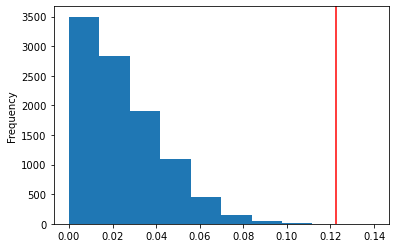

In [60]:
pd.Series(stats).plot(kind='hist')
plt.axvline(observed_stat, color = 'red')

In [61]:
np.mean(stats >= observed_stat)

0.0001

### indifferent, nearwater, nearwoods

In [71]:
indifferent = sqrls[['indifferent', 'nearwater', 'nearwoods']]
grouped = indifferent.groupby(indifferent['indifferent']).sum()
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])

stats = np.array([])

for i in range(10000):
    shuffled = indifferent['indifferent'].sample(frac=1).reset_index(drop=True)
    shuffled_df = indifferent.assign(**{'shuffled indifferent': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled indifferent').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

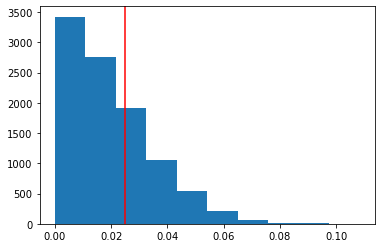

In [72]:
# pd.Series(stats).plot(kind='hist')
plt.hist(stats)
plt.axvline(observed_stat, color = 'red')

In [52]:
np.mean(stats >= observed_stat)

0.3293

### runs_from, nearwater, neargrass

In [63]:
runs_from = sqrls[['runs_from', 'nearwater', 'neargrass']]
grouped = runs_from.groupby(runs_from['runs_from']).sum()
grouped = grouped.divide(grouped.sum(axis=0), axis=1)
observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])

stats = np.array([])

for i in range(10000):
    shuffled = runs_from['runs_from'].sample(frac=1).reset_index(drop=True)
    shuffled_df = runs_from.assign(**{'shuffled runs_from': shuffled})
    shuffled_grouped = shuffled_df.groupby('shuffled runs_from').sum()
    shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
    shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
    stats = np.append(stats, shuffled_stat)

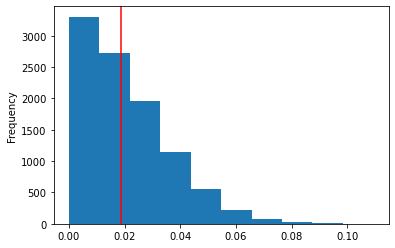

In [64]:
pd.Series(stats).plot(kind='hist')
plt.axvline(observed_stat, color = 'red')

In [65]:
np.mean(stats >= observed_stat)

0.4721

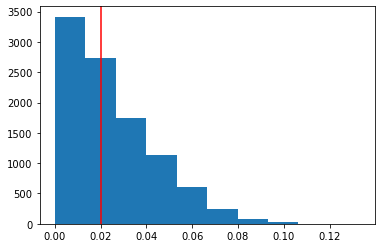

['approaches', 'nearbuilding', 'neargarden', 0.526]
_____________________________________________


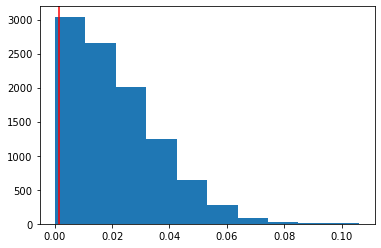

['approaches', 'nearbuilding', 'neargrass', 0.973]
_____________________________________________


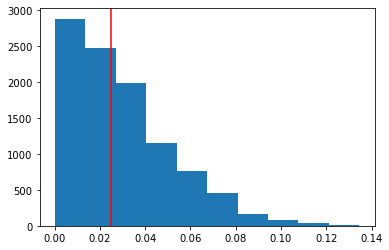

['approaches', 'nearbuilding', 'nearpedestrian', 0.4921]
_____________________________________________


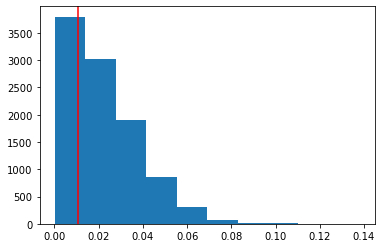

['approaches', 'nearbuilding', 'nearwater', 0.7004]
_____________________________________________


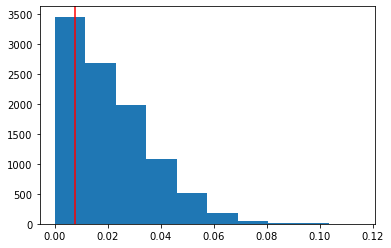

['approaches', 'nearbuilding', 'nearwoods', 0.7786]
_____________________________________________


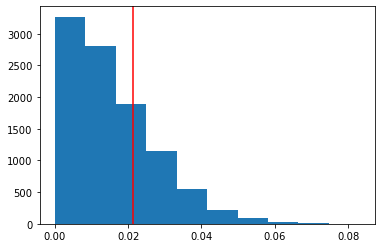

['approaches', 'neargarden', 'neargrass', 0.2793]
_____________________________________________


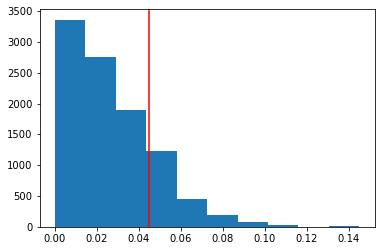

['approaches', 'neargarden', 'nearpedestrian', 0.1832]
_____________________________________________


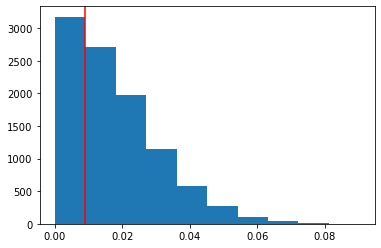

['approaches', 'neargarden', 'nearwater', 0.6826]
_____________________________________________


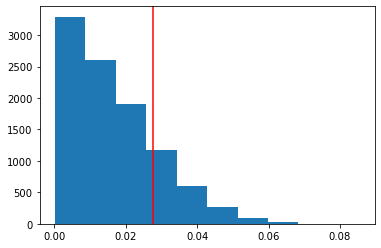

['approaches', 'neargarden', 'nearwoods', 0.1865]
_____________________________________________


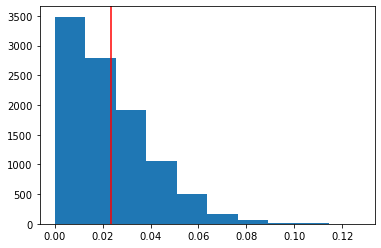

['approaches', 'neargrass', 'nearpedestrian', 0.4197]
_____________________________________________


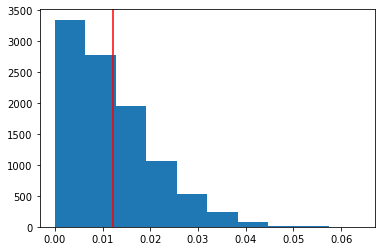

['approaches', 'neargrass', 'nearwater', 0.4145]
_____________________________________________


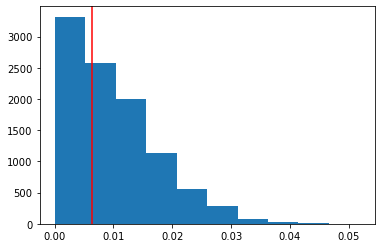

['approaches', 'neargrass', 'nearwoods', 0.622]
_____________________________________________


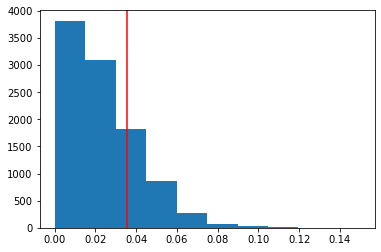

['approaches', 'nearpedestrian', 'nearwater', 0.2289]
_____________________________________________


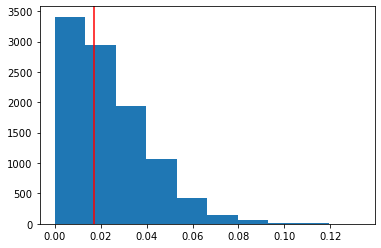

['approaches', 'nearpedestrian', 'nearwoods', 0.5653]
_____________________________________________


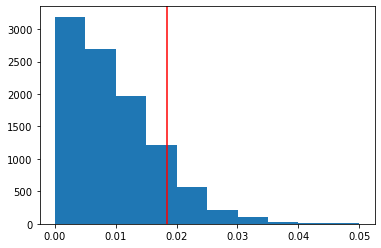

['approaches', 'nearwater', 'nearwoods', 0.1225]
_____________________________________________


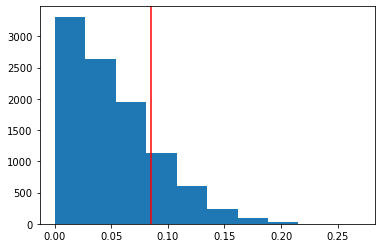

['indifferent', 'nearbuilding', 'neargarden', 0.1888]
_____________________________________________


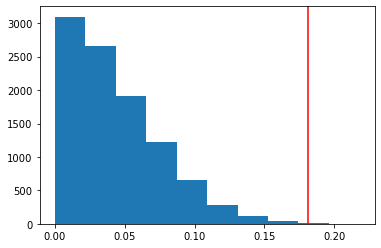

['indifferent', 'nearbuilding', 'neargrass', 0.0006]
_____________________________________________


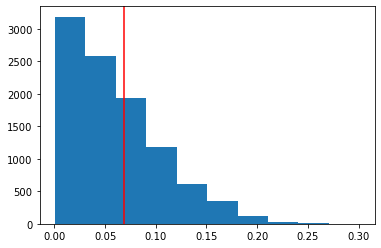

['indifferent', 'nearbuilding', 'nearpedestrian', 0.3636]
_____________________________________________


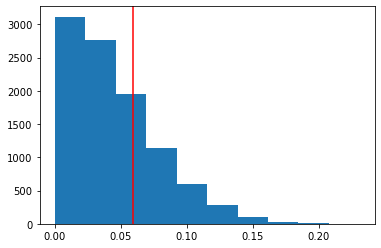

['indifferent', 'nearbuilding', 'nearwater', 0.2939]
_____________________________________________


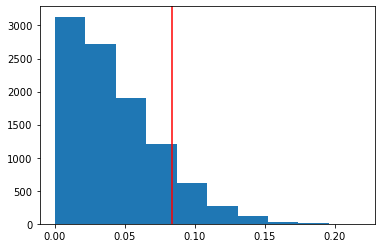

['indifferent', 'nearbuilding', 'nearwoods', 0.1183]
_____________________________________________


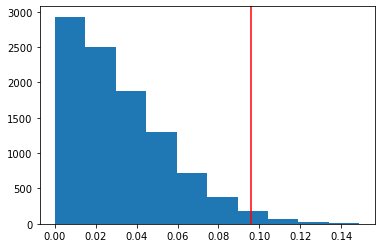

['indifferent', 'neargarden', 'neargrass', 0.0174]
_____________________________________________


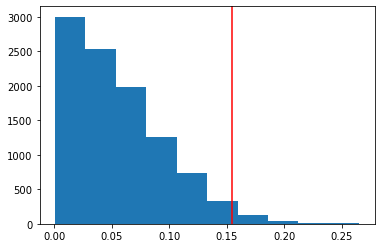

['indifferent', 'neargarden', 'nearpedestrian', 0.0222]
_____________________________________________


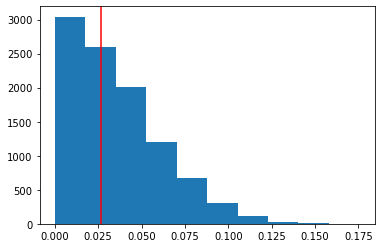

['indifferent', 'neargarden', 'nearwater', 0.5572]
_____________________________________________


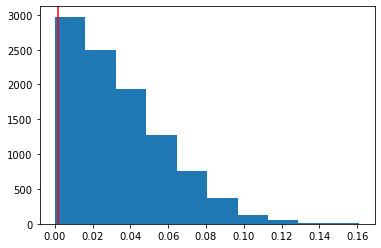

['indifferent', 'neargarden', 'nearwoods', 0.973]
_____________________________________________


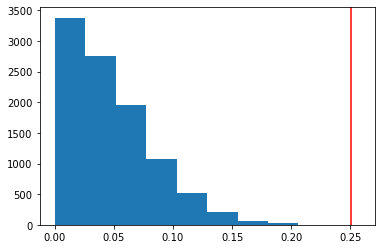

['indifferent', 'neargrass', 'nearpedestrian', 0.0001]
_____________________________________________


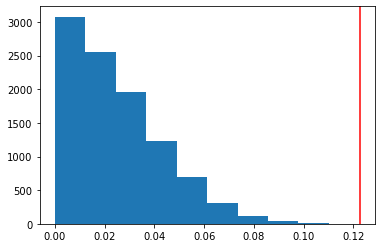

['indifferent', 'neargrass', 'nearwater', 0.0]
_____________________________________________


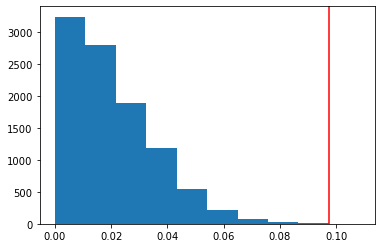

['indifferent', 'neargrass', 'nearwoods', 0.0002]
_____________________________________________


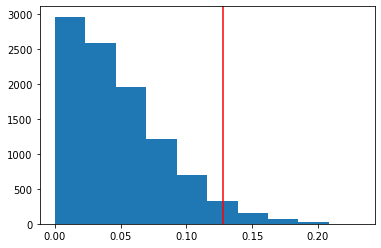

['indifferent', 'nearpedestrian', 'nearwater', 0.0379]
_____________________________________________


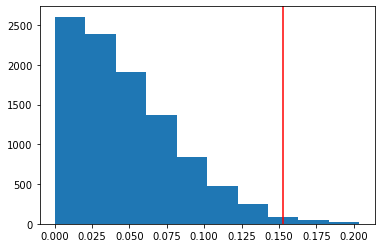

['indifferent', 'nearpedestrian', 'nearwoods', 0.0107]
_____________________________________________


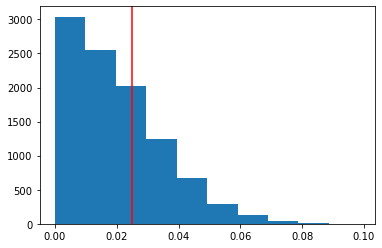

['indifferent', 'nearwater', 'nearwoods', 0.3199]
_____________________________________________


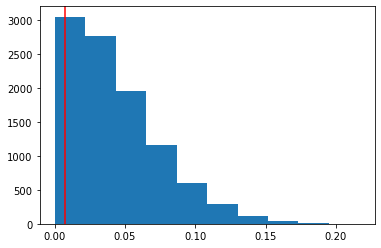

['runs_from', 'nearbuilding', 'neargarden', 0.9001]
_____________________________________________


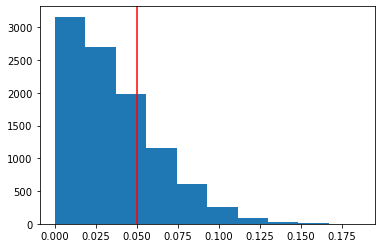

['runs_from', 'nearbuilding', 'neargrass', 0.2623]
_____________________________________________


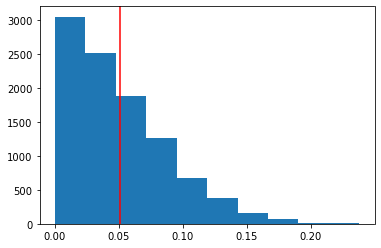

['runs_from', 'nearbuilding', 'nearpedestrian', 0.4195]
_____________________________________________


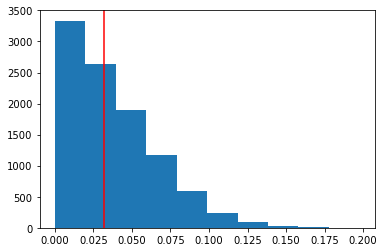

['runs_from', 'nearbuilding', 'nearwater', 0.498]
_____________________________________________


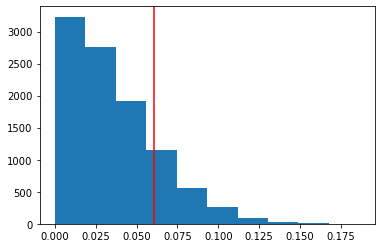

['runs_from', 'nearbuilding', 'nearwoods', 0.1753]
_____________________________________________


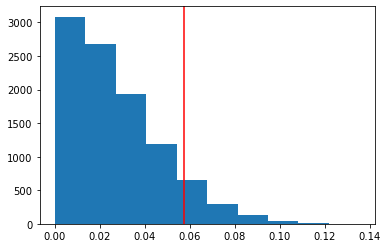

['runs_from', 'neargarden', 'neargrass', 0.0922]
_____________________________________________


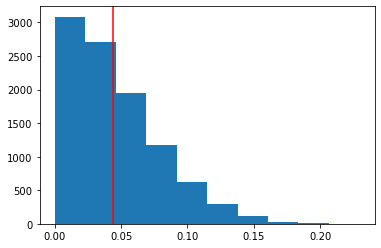

['runs_from', 'neargarden', 'nearpedestrian', 0.4442]
_____________________________________________


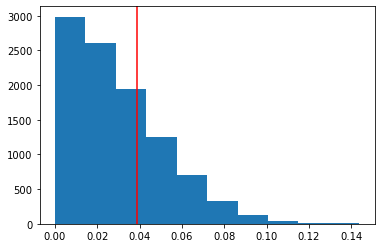

['runs_from', 'neargarden', 'nearwater', 0.2947]
_____________________________________________


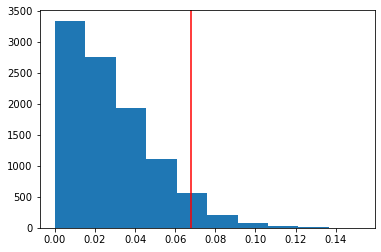

['runs_from', 'neargarden', 'nearwoods', 0.0546]
_____________________________________________


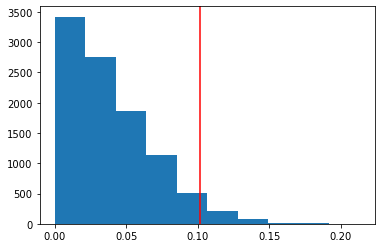

['runs_from', 'neargrass', 'nearpedestrian', 0.0397]
_____________________________________________


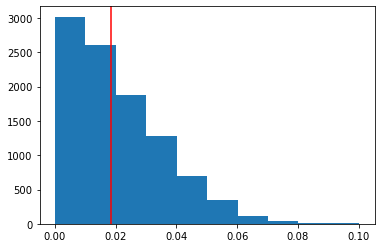

['runs_from', 'neargrass', 'nearwater', 0.4698]
_____________________________________________


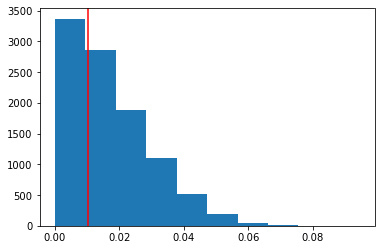

['runs_from', 'neargrass', 'nearwoods', 0.6341]
_____________________________________________


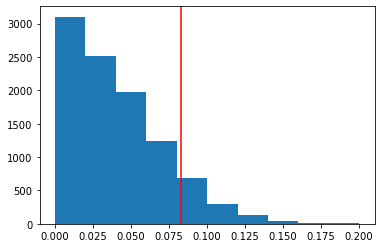

['runs_from', 'nearpedestrian', 'nearwater', 0.1064]
_____________________________________________


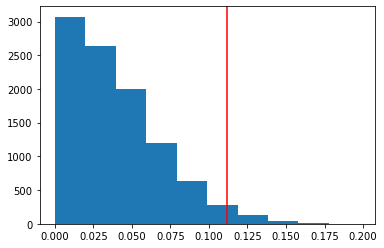

['runs_from', 'nearpedestrian', 'nearwoods', 0.026]
_____________________________________________


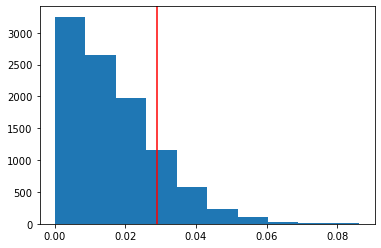

['runs_from', 'nearwater', 'nearwoods', 0.1637]
_____________________________________________


In [76]:
behaviors = ['approaches', 'indifferent', 'runs_from']
features = ['nearbuilding' ,'neargarden', 'neargrass', 'nearpedestrian', 'nearwater', 'nearwoods']

for b in behaviors:
    for i in range(len(features)):
        f1 = features[i]
        for j in range(i + 1, len(features)):
            f2 = features[j]
            behavior_df = sqrls[[b, f1, f2]]
            grouped = behavior_df.groupby(behavior_df[b]).sum()
            grouped = grouped.divide(grouped.sum(axis=0), axis=1)
            observed_stat = abs(grouped.loc[1][1] - grouped.loc[1][0])
            
            stats = np.array([])

            for i in range(10000):
                shuffled = behavior_df[b].sample(frac=1).reset_index(drop=True)
                shuffled_df = behavior_df.assign(**{'shuffled ' + b: shuffled})
                shuffled_grouped = shuffled_df.groupby('shuffled ' + b).sum()
                shuffled_grouped = shuffled_grouped.divide(shuffled_grouped.sum(axis=0), axis=1)
                shuffled_stat = abs(shuffled_grouped.loc[1][2] - shuffled_grouped.loc[1][1])
                stats = np.append(stats, shuffled_stat)
            
            plt.hist(stats)
            plt.axvline(observed_stat, color = 'red') 
            plt.show()
            
            p_value = np.mean(stats >= observed_stat)
            
            print([b, f1, f2, p_value])
            print('_____________________________________________')